# Лабораторная работа №3. Синтез БИХ-фильтров.
Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ

# Модуль 2. Метод билинейного *z*-преобразования.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Представление фильтра в виде каскада блоков второго порядка /  Second-order sections  (SOS) representation

$$ [\beta_0, \beta_1, \beta_2, 1, \alpha_1, \alpha_2]$$

$$ [a_0, a_1, a_2, 1, -b_1, -b_2]$$

Для физически реализуемой дискретной LTI–системы разностное уравнение может быть записано в виде 
$$\sum\limits_{m=0}^{M}{{{\alpha }_{m}}}y[k-m]=\sum\limits_{m=0}^{N-1}{{{\beta }_{m}}}x[k-m],$$
где $\alpha_m$ и $\beta_m$ – заданные коэффициенты, $M$ и $N$ – натуральные числа. Как правило, полагают ${{\alpha }_{0}}=1$.


### Пример биквадратного блока.
Рассмотрим фильтр с разностным уравнением

$$x[k]+2x[k-1]+x[k-2]=y[k]-\frac{3}{2}y[k-1]+\frac{1}{2}y[k-2],\ y[-1]=y[-2]=0.$$

 В данном случае $\alpha_0=1$, $\alpha_1=-1.5$, $\alpha_2=0.5$ и  $\beta_0=1$, $\beta_1=2$, $\beta_2=1$.

Передаточная функция  такого фильтра

$$H\left( \text{ }\!\!~\!\!\text{ }z\text{ }\!\!~\!\!\text{ } \right)=\frac{1+2{{z}^{-1}}+{{z}^{-2}}}{1-\frac{3}{2}{{z}^{-1}}+\frac{1}{2}{{z}^{-2}}}=\frac{{{\beta }_{0}}+{{\beta }_{1}}{{z}^{-1}}+{{\beta }_{2}}{{z}^{-2}}}{1+{{\alpha }_{1}}{{z}^{-1}}+{{\alpha }_{2}}{{z}^{-2}}}=\frac{{{a}_{0}}+{{a}_{1}}{{z}^{-1}}+{{a}_{2}}{{z}^{-2}}}{1-{{b}_{1}}{{z}^{-1}}-{{b}_{2}}{{z}^{-2}}}=\frac{{{\left( \text{ }\!\!~\!\!\text{ }1+{{z}^{-1}}\text{ }\!\!~\!\!\text{ } \right)}^{2}}}{\left( \text{ }\!\!~\!\!\text{ }1-\frac{1}{2}{{z}^{-1}}\text{ }\!\!~\!\!\text{ } \right)\left( \text{ }\!\!~\!\!\text{ }1-{{z}^{-1}}\text{ }\!\!~\!\!\text{ } \right)}\cdot \text{ }\!\!~\!\!\text{ }$$

In [3]:
alpha=np.array([1, -1.5, 0.5])
beta=np.array([1, 2, 1])
signal.tf2sos(beta, alpha)

array([[ 1. ,  2. ,  1. ,  1. , -1.5,  0.5]])

$ \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, [\beta_0, \,\,\,\,\,\beta_1, \,\,\,\,\, \beta_2, \,\,\,\,\, 1, \,\,\,\,\,\alpha_1, \,\,\,\,\,\alpha_2]$

$ \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, [a_0,\,\,\,\,\,  a_1, \,\,\,\,\, a_2, \,\,\,\,\, 1, \, -b_1,  \, -b_2]$

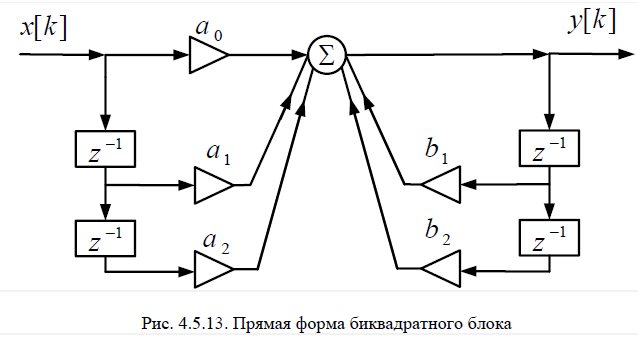

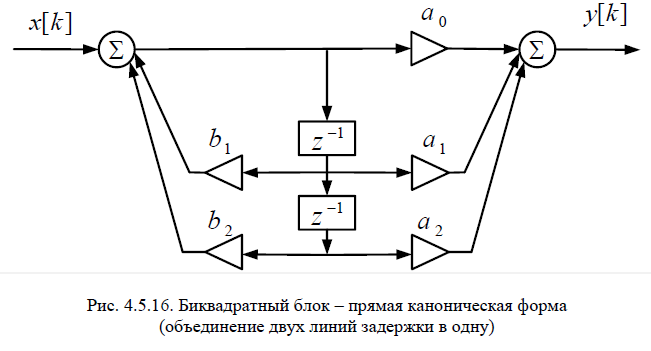

In [4]:
filter2=signal.tf2sos(beta, alpha)
filter2

array([[ 1. ,  2. ,  1. ,  1. , -1.5,  0.5]])

### Расчет отклика фильтра, представленого каскадом блоков второго порядка

`signal.sosfilt`



In [5]:
N=50
x=np.zeros(N)
x[0]=1
signal.sosfilt(filter2, x)

array([1.        , 3.5       , 5.75      , 6.875     , 7.4375    ,
       7.71875   , 7.859375  , 7.9296875 , 7.96484375, 7.98242188,
       7.99121094, 7.99560547, 7.99780273, 7.99890137, 7.99945068,
       7.99972534, 7.99986267, 7.99993134, 7.99996567, 7.99998283,
       7.99999142, 7.99999571, 7.99999785, 7.99999893, 7.99999946,
       7.99999973, 7.99999987, 7.99999993, 7.99999997, 7.99999998,
       7.99999999, 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ])

In [6]:
signal.lfilter(b=beta, a=alpha, x=x)

array([1.        , 3.5       , 5.75      , 6.875     , 7.4375    ,
       7.71875   , 7.859375  , 7.9296875 , 7.96484375, 7.98242188,
       7.99121094, 7.99560547, 7.99780273, 7.99890137, 7.99945068,
       7.99972534, 7.99986267, 7.99993134, 7.99996567, 7.99998283,
       7.99999142, 7.99999571, 7.99999785, 7.99999893, 7.99999946,
       7.99999973, 7.99999987, 7.99999993, 7.99999997, 7.99999998,
       7.99999999, 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ,
       8.        , 8.        , 8.        , 8.        , 8.        ])

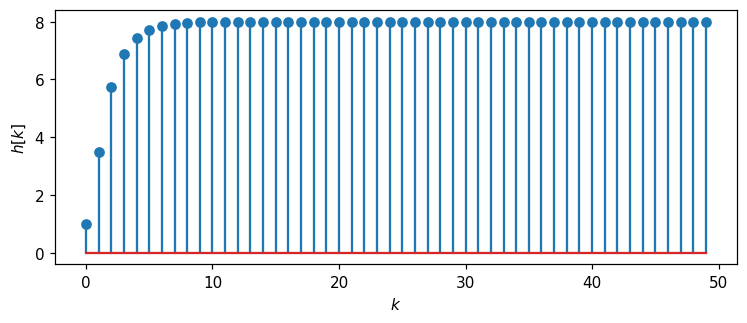

In [8]:
h=signal.sosfilt(filter2, x)
k=np.arange(h.size)
plt.figure(figsize=[8, 3], dpi=110)
plt.stem(k, h)
plt.xlabel("$k$")
plt.ylabel("$h[k]$")
plt.show()

### Нуль-полюсная диаграмма фильтра, представленого каскадом блоков второго порядка

```signal.sos2zpk```

z =  [-1.+0.j -1.+0.j]
p =  [1. +0.j 0.5+0.j]
k =  1.0


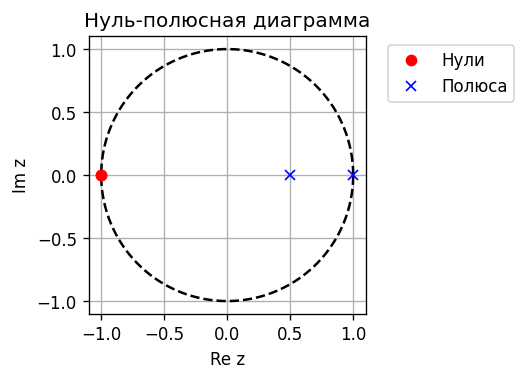

In [9]:
z, p, k = signal.sos2zpk(filter2)
print("z = ", z)
print("p = ", p)
print("k = ", k)
q = np.linspace(0, 2*np.pi, 401)

plt.figure(figsize=[3, 3], dpi=120)
plt.plot(np.cos(q), np.sin(q), 'k--')  
plt.plot(z.real, z.imag, 'ro', label='Нули')
plt.plot(p.real, p.imag, 'bx', label='Полюса')
plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.title("Нуль-полюсная диаграмма")
plt.xlabel("Re z")
plt.ylabel("Im z")
plt.show()

$$H\left( \text{ }\!\!~\!\!\text{ }z\text{ }\!\!~\!\!\text{ } \right)=\frac{1+2{{z}^{-1}}+{{z}^{-2}}}{1-\frac{3}{2}{{z}^{-1}}+\frac{1}{2}{{z}^{-2}}}=\frac{{{\beta }_{0}}+{{\beta }_{1}}{{z}^{-1}}+{{\beta }_{2}}{{z}^{-2}}}{1+{{\alpha }_{1}}{{z}^{-1}}+{{\alpha }_{2}}{{z}^{-2}}}=\frac{{{a}_{0}}+{{a}_{1}}{{z}^{-1}}+{{a}_{2}}{{z}^{-2}}}{1-{{b}_{1}}{{z}^{-1}}-{{b}_{2}}{{z}^{-2}}}=\frac{{{\left( \text{ }\!\!~\!\!\text{ }1+{{z}^{-1}}\text{ }\!\!~\!\!\text{ } \right)}^{2}}}{\left( \text{ }\!\!~\!\!\text{ }1-\frac{1}{2}{{z}^{-1}}\text{ }\!\!~\!\!\text{ } \right)\left( \text{ }\!\!~\!\!\text{ }1-{{z}^{-1}}\text{ }\!\!~\!\!\text{ } \right)} = \dfrac{(1+z)^2}{(z-0,5)(z-1)}$$

### Частотная характеристика фильтра, представленого каскадом блоков второго порядка

```signal.sosfreqz```

/home/stanislav/mipt/masters/digital-signals-laboratory/env/lib/python3.11/site-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: divide by zero encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
/home/stanislav/mipt/masters/digital-signals-laboratory/env/lib/python3.11/site-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
/home/stanislav/mipt/masters/digital-signals-laboratory/env/lib/python3.11/site-packages/scipy/signal/_filter_design.py:850: RuntimeWarning: invalid value encountered in multiply
  h *= rowh


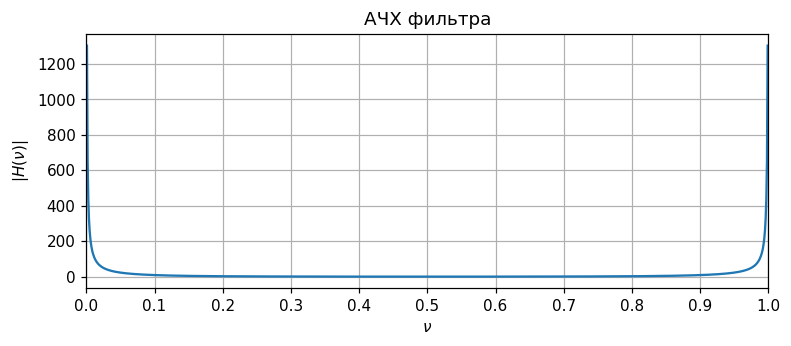

In [10]:
nu, H = signal.sosfreqz(filter2, worN=1024, whole=True, fs=1)
plt.figure(figsize=[8, 3], dpi=110)
plt.plot(nu, abs(H))
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.title("АЧХ фильтра")
plt.xlim([0, 1])
plt.xticks(np.linspace(0, 1, 11))
plt.grid()
plt.show()

**Примечание.** Фильтр содержит полюс в $H(z)$ на единичной окружности и в итоге его АЧХ стремится к $\infty$ при $\nu=0$.

### Коэффициенты $\beta_i$, $\alpha_i$ в разностном уравнении 

```signal.sos2tf```

In [12]:
signal.sos2tf(filter2)

(array([1., 2., 1.]), array([ 1. , -1.5,  0.5]))

Такая функция позволяет перейти от каскада блоков второго порядка к прямой и прямой канонической форме реализации цифрового фильтра

### Представление в виде блоков второго порядка из коэффициентов разностного уравнения

```signal.tf2sos```

In [13]:
alpha=np.array([1, -1.5, 0.5])
beta=np.array([1, 2, 1])
signal.tf2sos(beta, alpha)

array([[ 1. ,  2. ,  1. ,  1. , -1.5,  0.5]])

Такая функция позволяет перейти от прямой и прямой канонической формы реализации цифрового фильтра к каскаду блоков второго порядка 

### Представление в виде блоков второго порядка из нулей, полюсов и коэффициэнта в $H(z)$.

```signal.zpk2sos```

$$H\left( \text{ }\!\!~\!\!\text{ }z\text{ }\!\!~\!\!\text{ } \right)=\frac{1+2{{z}^{-1}}+{{z}^{-2}}}{1-\frac{3}{2}{{z}^{-1}}+\frac{1}{2}{{z}^{-2}}}=\frac{{{\beta }_{0}}+{{\beta }_{1}}{{z}^{-1}}+{{\beta }_{2}}{{z}^{-2}}}{1+{{\alpha }_{1}}{{z}^{-1}}+{{\alpha }_{2}}{{z}^{-2}}}=\frac{{{a}_{0}}+{{a}_{1}}{{z}^{-1}}+{{a}_{2}}{{z}^{-2}}}{1-{{b}_{1}}{{z}^{-1}}-{{b}_{2}}{{z}^{-2}}}=\frac{{{\left( \text{ }\!\!~\!\!\text{ }1+{{z}^{-1}}\text{ }\!\!~\!\!\text{ } \right)}^{2}}}{\left( \text{ }\!\!~\!\!\text{ }1-\frac{1}{2}{{z}^{-1}}\text{ }\!\!~\!\!\text{ } \right)\left( \text{ }\!\!~\!\!\text{ }1-{{z}^{-1}}\text{ }\!\!~\!\!\text{ } \right)} = \dfrac{(1+z)^2}{(z-0,5)(z-1)}$$

In [14]:
z =  [-1.+0.j, -1.+0.j]
p =  [1. +0.j, 0.5+0.j]
k =  1.0

In [15]:
signal.zpk2sos(z, p, k)

array([[ 1. ,  2. ,  1. ,  1. , -1.5,  0.5]])

## Синтез фильтров методом билинейного $z$ - преобразования

### Пример. Синтез на основе RC-цепи

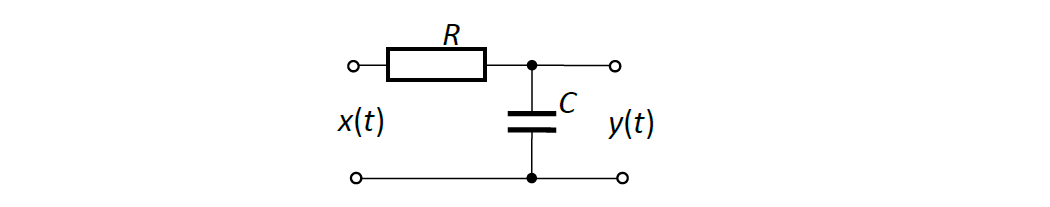


Для $RC-$цепи справедливо уравнение Кирхгофа
$$i\left( t \right)\text{=} C\frac{dy}{dt}\text{ }\text{,   }RC\frac{dy}{dt}\text{+ }y\left( t \right)=x\left( t \right),$$
где $x(t)$, $y(t)$ – напряжения на входе и выходе цепи соответственно. Пусть в начальный момент времени, $y(0)=0$. Лапласов образ этого уравнения
$$RCpY(p)+Y(p)=X(p).$$
Тогда передаточная функция аналогового фильтра имеет вид
$${{H}_{a}}(p)=\frac{Y(p)}{X(p)}=\frac{1}{1+RCp}=\frac{1}{RC\left( p+\frac{1}{RC} \right)}.$$

$$p=\frac{2}{\Delta t}\cdot \frac{z-1}{z+1}=\frac{2}{\Delta t}\cdot \frac{1-{{z}^{-1}}}{1+{{z}^{-1}}}$$

$$H(z)=\frac{1}{1+\frac{2RC}{\Delta t}\frac{1-{{z}^{-1}}}{1+{{z}^{-1}}}}=\frac{1+{{z}^{-1}}}{1+{{z}^{-1}}+\frac{2RC}{\Delta t}-\frac{2RC}{\Delta t}{{z}^{-1}}}=\frac{1+{{z}^{-1}}}{\left( 1+\frac{2RC}{\Delta t} \right)+{{z}^{-1}}\left( 1-\frac{2RC}{\Delta t} \right)}$$

In [16]:
RC=2*1e-4
dt=RC/8
lti_RC=signal.lti([1], [RC, 1])
lti_RC

TransferFunctionContinuous(
array([5000.]),
array([1.e+00, 5.e+03]),
dt: None
)

In [17]:
signal.ZerosPolesGain(lti_RC)

ZerosPolesGainContinuous(
array([], dtype=float64),
array([-5000.]),
5000.0,
dt: None
)

In [18]:
beta=[1, 1]
alpha=[(1+2*RC/dt), (1-2*RC/dt)]
dlti_RC=signal.dlti(beta, alpha, dt=dt)
dlti_RC

TransferFunctionDiscrete(
array([0.05882353, 0.05882353]),
array([ 1.        , -0.88235294]),
dt: 2.5e-05
)

In [19]:
signal.ZerosPolesGain(dlti_RC)

ZerosPolesGainDiscrete(
array([-1.]),
array([0.88235294]),
0.058823529411764705,
dt: 2.5e-05
)

In [20]:
w_a, H_a=signal.freqresp(lti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024)/dt)

In [21]:
theta_d, H_d=signal.dfreqresp(dlti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024))

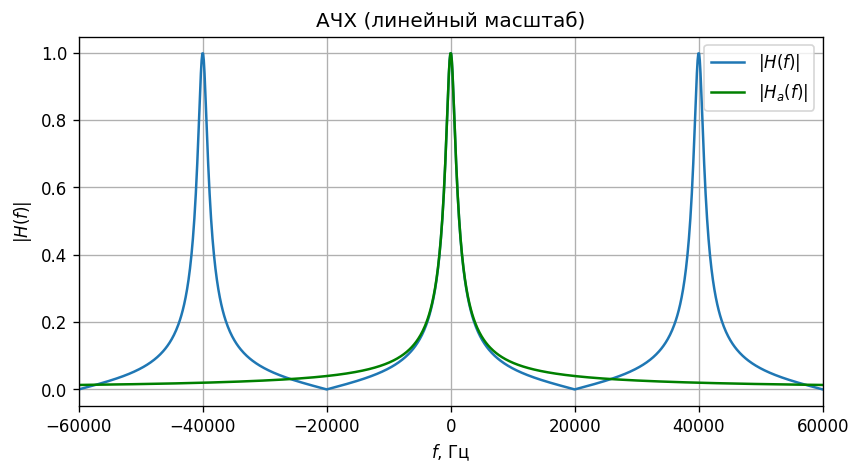

In [22]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), abs(H_d), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), abs(H_a), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.legend(loc='upper right')
plt.grid()

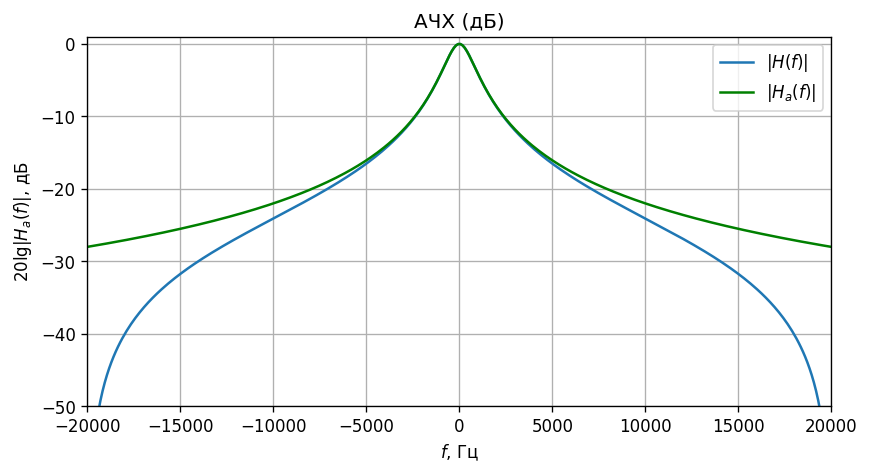

In [23]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (дБ)")
plt.xlim([-0.5/dt, 0.5/dt])
plt.ylim([-50, 1])
plt.legend(loc='upper right')
plt.grid()

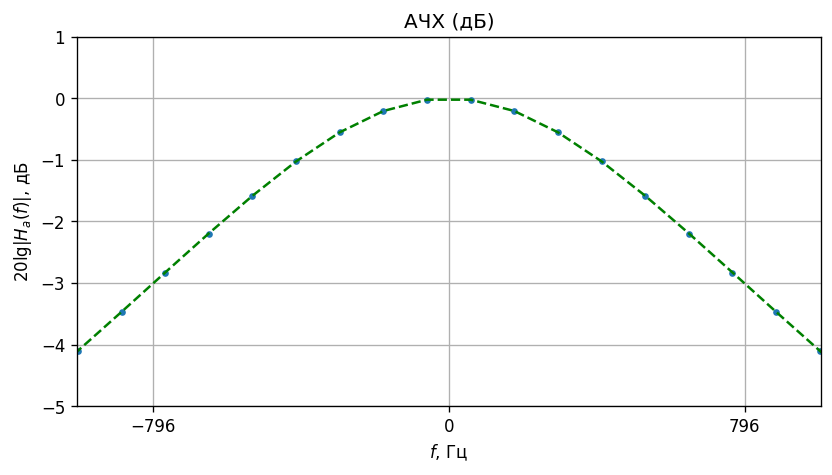

In [24]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)), '.')
plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "g--")
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (дБ)")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.xlim([-1000, 1000])
plt.ylim([-5, 1])
plt.grid()

$${{\theta }_{0}}=2\text{acrtg}\left( \frac{{{\omega }_{a}}\Delta t}{2} \right)+2\pi n,\text{ }n\in Z.$$

$$f_0=\dfrac{1}{\pi\Delta t}\text{acrtg}\left( {\pi f_a \Delta t} \right)+2\pi n,\text{ }n\in Z.$$

In [25]:
fc=1/(2*np.pi*RC)
fc

795.7747154594767

In [26]:
np.arctan(np.pi*fc*dt)/(dt*np.pi)

794.7409722216336

$$2\pi f_0 = \omega_0 (рад/с)$$

$$2\pi f_0 / f_Д= \theta_0 (рад)$$

$$2\pi \nu_0 =  \theta_0 (рад)$$

$$\nu_0 =  f_0 / f_Д$$

### signal.bilinear


$${{H}_{a}}(p)=\frac{Y(p)}{X(p)}=\frac{1}{1+RCp}=\frac{1}{RC\left( p+\frac{1}{RC} \right)}.$$
$$H(z)=\frac{1+{{z}^{-1}}}{\left( 1+\frac{2RC}{\Delta t} \right)+{{z}^{-1}}\left( 1-\frac{2RC}{\Delta t} \right)}$$


In [27]:
lti_RC=signal.lti([1], [RC, 1])
lti_RC

TransferFunctionContinuous(
array([5000.]),
array([1.e+00, 5.e+03]),
dt: None
)

In [28]:
signal.bilinear([1], [RC, 1], fs=1/dt)

(array([0.05882353, 0.05882353]), array([ 1.        , -0.88235294]))

In [29]:
beta=np.array([1, 1])
alpha=np.array([(1+2*RC/dt), (1-2*RC/dt)])
beta, alpha

(array([1, 1]), array([ 17., -15.]))

In [30]:
beta/alpha[0], alpha/alpha[0]

(array([0.05882353, 0.05882353]), array([ 1.        , -0.88235294]))

### bilinear_zpk
$${{H}_{a}}(p)=\frac{Y(p)}{X(p)}=\frac{1}{1+RCp}=\frac{1}{RC\left( p+\frac{1}{RC} \right)}.$$

In [31]:
signal.bilinear_zpk([], [-1/RC], 1/RC, fs=1/dt)

(array([-1.]), array([0.88235294]), 0.05882352941176471)

In [29]:
signal.tf2zpk(beta, alpha)

(array([-1.]), array([0.88235294]), 0.058823529411764705)

### Пример задачи синтеза БИХ-фильтра с заданными характеристиками

Синтезировать (получить коэффициенты в разностном уравнении) для БИХ-фильтра нижних частот со следующими характеристиками:
* частота дискретизации $f_{д}=2000$ Гц
* граничная частота полосы пропускания $f_1=450$ Гц,
* граничная частота полосы задерживания $f_2=550$ Гц,
* максимальное допустимое затухание в полосе пропускания $a_\max=0.9151$ дБ ($\delta_1=0.1$),
* минимальное допустимое затухание в полосе задерживания $a_\min=26$ дБ  ($\delta_2=0.05$).

Воспользоваться методом билинейного z-преобразования для фильтров: 

1) Баттервота,

2) Чебышёва 1 рода,

3) Чебышёва 2 рода,

4) Золотарёва—Кауэра.

Из четырех получившихся результатов выбрать фильтр, обладающий наименьшим порядком $N$ и построить схему его реализации.

In [32]:
20*np.log10(1-0.1)

-0.9151498112135024

In [33]:
20*np.log10(0.05)

-26.020599913279625

$$20\log_{10}|H(f)|=10\log_{10}|H(f)|^2$$

In [34]:
fs=2000
wp=450
ws=550
gpass=0.9151
gstop=26

### Синтез на основе фильтра Баттерворта

In [35]:
N, Wn = signal.buttord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha = signal.butter(N, Wn=Wn, btype='lowpass', analog=False, output='ba', fs=fs)
N, Wn, beta, alpha 

(12,
 469.07403273419607,
 array([0.00049536, 0.00594431, 0.03269368, 0.10897894, 0.24520262,
        0.3923242 , 0.45771157, 0.3923242 , 0.24520262, 0.10897894,
        0.03269368, 0.00594431, 0.00049536]),
 array([ 1.00000000e+00, -7.40137276e-01,  1.85620765e+00, -1.00048513e+00,
         1.12306630e+00, -4.31585882e-01,  2.70552307e-01, -7.04956090e-02,
         2.51937041e-02, -3.99941718e-03,  7.23271847e-04, -5.29107439e-05,
         2.78114290e-06]))

In [36]:
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)

In [37]:
wp

450

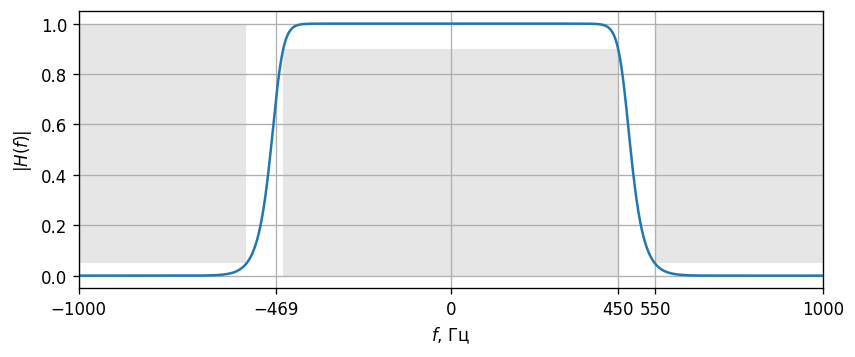

In [38]:
plt.figure(figsize=[8, 3], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, (abs(H)))
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.fill([-wp,-wp, wp, wp], [0, 0.9, 0.9, 0], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [0.05, 1, 1, 0.05], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [0.05, 1, 1, 0.05], '0.9', lw=0)

plt.grid()

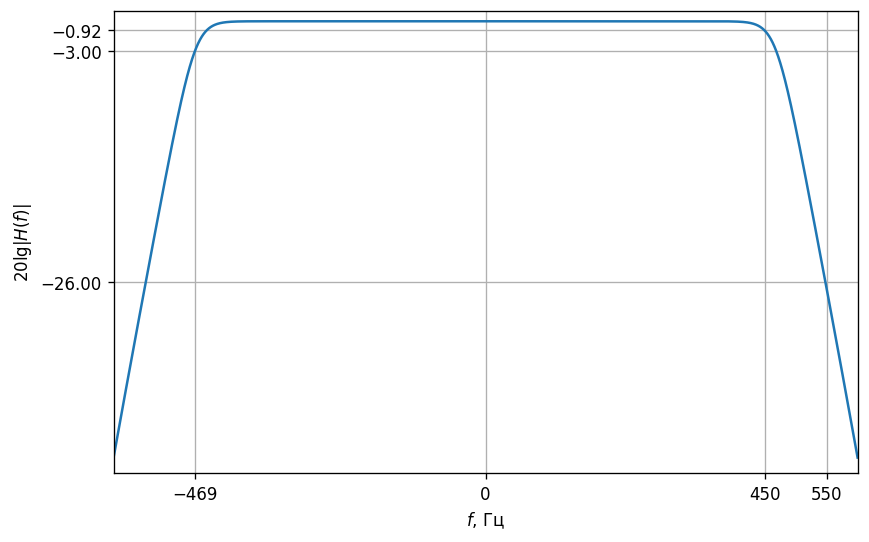

In [39]:
plt.figure(figsize=[8, 5], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, 20*np.log10(abs(H)))
plt.xticks([-Wn, 0, wp, ws])

plt.yticks([-gstop, -3, -gpass])

plt.xlim([-600, 600])
plt.ylim([-45, 1])
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg|H(f)|$")
plt.grid()

In [40]:
signal.tf2sos(beta, alpha)

array([[ 4.95358837e-04,  1.07802516e-03,  5.86835903e-04,
         1.00000000e+00, -9.76500067e-02,  6.65945603e-03],
       [ 1.00000000e+00,  2.12008188e+00,  1.12820415e+00,
         1.00000000e+00, -1.01070982e-01,  4.19257872e-02],
       [ 1.00000000e+00,  2.03124332e+00,  1.03885218e+00,
         1.00000000e+00, -1.08407878e-01,  1.17560754e-01],
       [ 1.00000000e+00,  1.94220667e+00,  9.49189703e-01,
         1.00000000e+00, -1.20810245e-01,  2.45414924e-01],
       [ 1.00000000e+00,  1.85136497e+00,  8.57182498e-01,
         1.00000000e+00, -1.40496067e-01,  4.48353146e-01],
       [ 1.00000000e+00,  1.87885215e+00,  8.85187921e-01,
         1.00000000e+00, -1.71702098e-01,  7.70051496e-01]])

$$ [\beta_0, \beta_1, \beta_2, 1, \alpha_1, \alpha_2]$$

$$ [a_0, a_1, a_2, 1, -b_1, -b_2]$$

### Синтез на основе фильтра  Чебышёва 1 рода

In [41]:
N, Wn = signal.cheb1ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha= signal.cheby1(N=N, rp=gpass, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)

In [42]:
N, Wn, beta, alpha 

(6,
 450.0,
 array([0.00531537, 0.03189221, 0.07973052, 0.10630736, 0.07973052,
        0.03189221, 0.00531537]),
 array([ 1.        , -2.19669111,  3.38745011, -3.34973697,  2.33227843,
        -1.05600987,  0.26068897]))

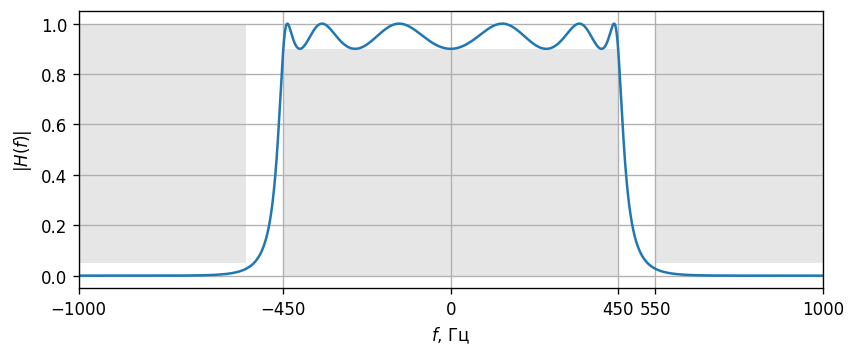

In [43]:
plt.figure(figsize=[8, 3], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, (abs(H)))
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.grid()
plt.fill([-wp,-wp, wp, wp], [0, 0.9, 0.9, 0], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [0.05, 1, 1, 0.05], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [0.05, 1, 1, 0.05], '0.9', lw=0)

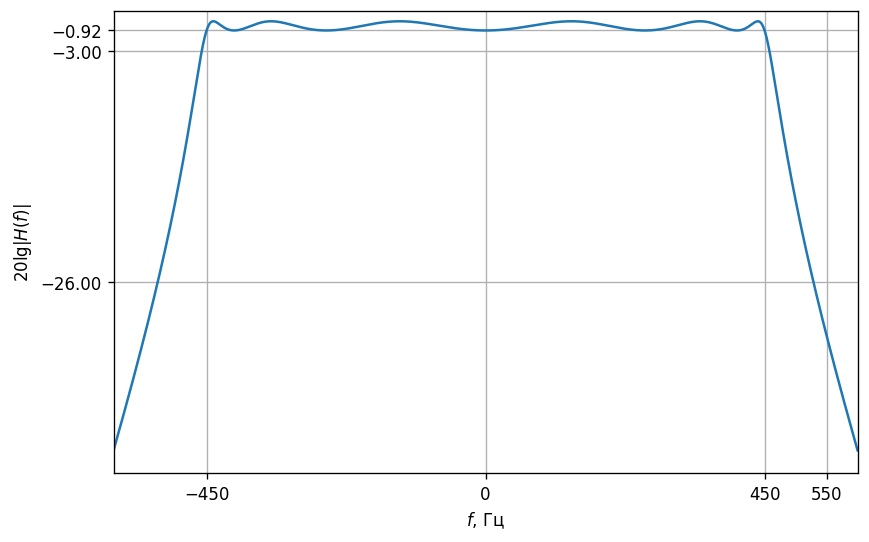

In [44]:
plt.figure(figsize=[8, 5], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, 20*np.log10(abs(H)))
plt.xticks([-Wn, 0, wp, ws])
plt.yticks([-gstop, -3, -gpass])
plt.xlim([-600, 600])
plt.ylim([-45, 1])
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg|H(f)|$")
plt.grid()

In [45]:
signal.tf2sos(beta, alpha)

array([[ 0.00531537,  0.01066611,  0.00535082,  1.        , -1.20634274,
         0.45570205],
       [ 1.        ,  1.99998185,  0.99999658,  1.        , -0.69104945,
         0.64964573],
       [ 1.        ,  1.99336295,  0.99337761,  1.        , -0.29929892,
         0.88057242]])

### Синтез на основе фильтра  Чебышёва 2 рода

In [46]:
N, Wn = signal.cheb2ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha= signal.cheby2(N=N, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)

In [47]:
N, Wn, beta, alpha 

(6,
 528.955207986288,
 array([0.16218724, 0.4641964 , 0.83139864, 0.98815273, 0.83139864,
        0.4641964 , 0.16218724]),
 array([1.        , 0.5226103 , 1.21342732, 0.5938886 , 0.41623226,
        0.13077052, 0.02678829]))

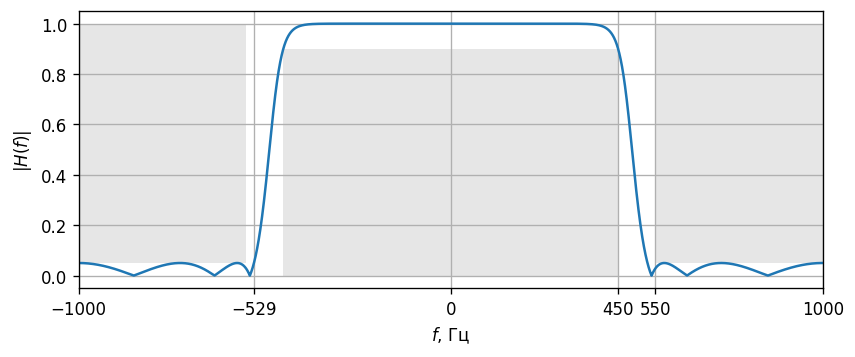

In [48]:
plt.figure(figsize=[8, 3], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, (abs(H)))
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.grid()
plt.fill([-wp,-wp, wp, wp], [0, 0.9, 0.9, 0], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [0.05, 1, 1, 0.05], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [0.05, 1, 1, 0.05], '0.9', lw=0)

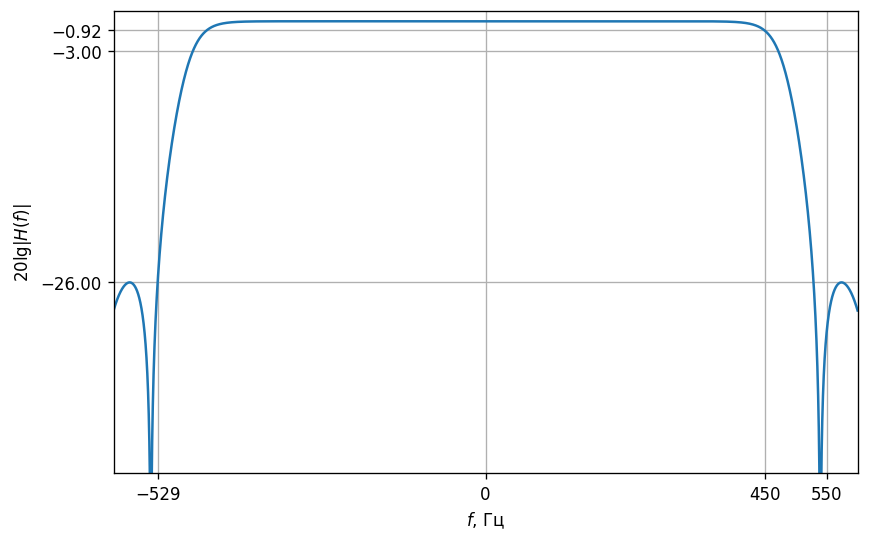

In [49]:
plt.figure(figsize=[8, 5], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, 20*np.log10(abs(H)))
plt.xticks([-Wn, 0, wp, ws])
plt.yticks([-gstop, -3, -gpass])
plt.xlim([-600, 600])
plt.ylim([-45, 1])
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg|H(f)|$")
plt.grid()

In [50]:
signal.tf2sos(beta, alpha)

array([[ 0.16218724,  0.29006975,  0.16218724,  1.        ,  0.45853086,
         0.10101624],
       [ 1.        ,  0.82341381,  1.        ,  1.        ,  0.17359689,
         0.35497093],
       [ 1.        ,  0.2502012 ,  1.        ,  1.        , -0.10951744,
         0.74706964]])

### Синтез на основе фильтра Золотарёва—Кауэра.

In [51]:
N, Wn = signal.ellipord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha = signal.ellip(N=N, rp=gpass, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)

In [52]:
N, Wn, beta, alpha 

(4,
 450.0,
 array([0.1467874 , 0.19800444, 0.31253939, 0.19800444, 0.1467874 ]),
 array([ 1.        , -0.90641397,  1.36844601, -0.63293032,  0.28436198]))

In [53]:
signal.tf2sos(beta, alpha)

array([[ 0.1467874 ,  0.18277379,  0.1467874 ,  1.        , -0.62594751,
         0.32926671],
       [ 1.        ,  0.10375988,  1.        ,  1.        , -0.28046646,
         0.86362202]])

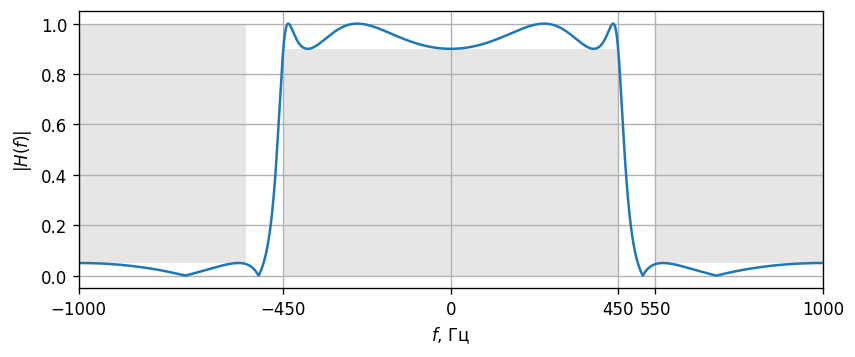

In [54]:
plt.figure(figsize=[8, 3], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, (abs(H)))
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.grid()
plt.fill([-wp,-wp, wp, wp], [0, 0.9, 0.9, 0], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [0.05, 1, 1, 0.05], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [0.05, 1, 1, 0.05], '0.9', lw=0)

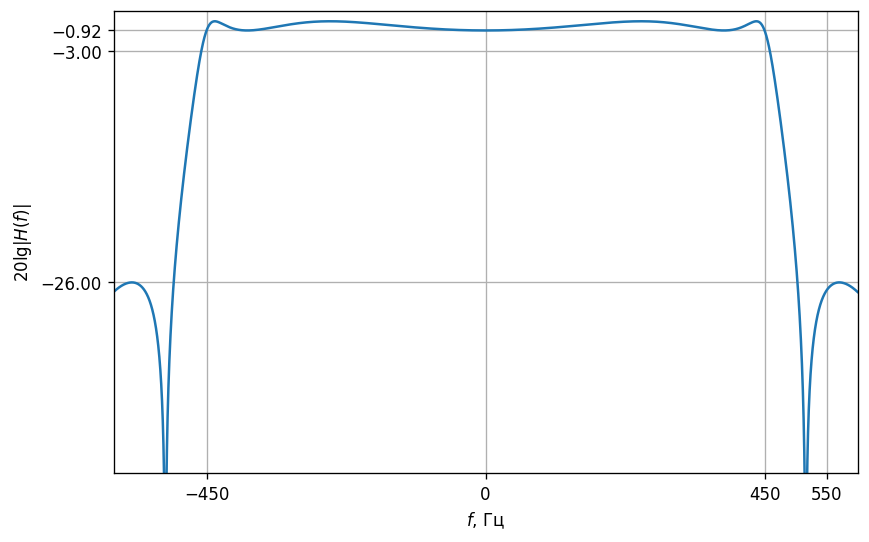

In [55]:
plt.figure(figsize=[8, 5], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, 20*np.log10(abs(H)))
plt.xticks([-Wn, 0, wp, ws])
plt.yticks([-gstop, -3, -gpass])
plt.xlim([-600, 600])
plt.ylim([-45, 1])
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg|H(f)|$")
plt.grid()

In [56]:
signal.tf2sos(beta, alpha)

array([[ 0.1467874 ,  0.18277379,  0.1467874 ,  1.        , -0.62594751,
         0.32926671],
       [ 1.        ,  0.10375988,  1.        ,  1.        , -0.28046646,
         0.86362202]])

### Пример синтеза фильтра библиотечными функциями
$\begin{align}
  & H(z)=\frac{0,0985+0,2956{{z}^{-1}}+0,2956{{z}^{-2}}+0,0985{{z}^{-3}}}{1-0,5772{{z}^{-1}}+0,4218{{z}^{-2}}-0,0563{{z}^{-3}}}= \\ 
 & =0,0985\frac{1+{{z}^{-1}}}{1-0,1584{{z}^{-1}}}\cdot \frac{1+2{{z}^{-1}}+{{z}^{-2}}}{1-0,4188{{z}^{-1}}+0,3554{{z}^{-2}}}. \\ 
\end{align}$ 


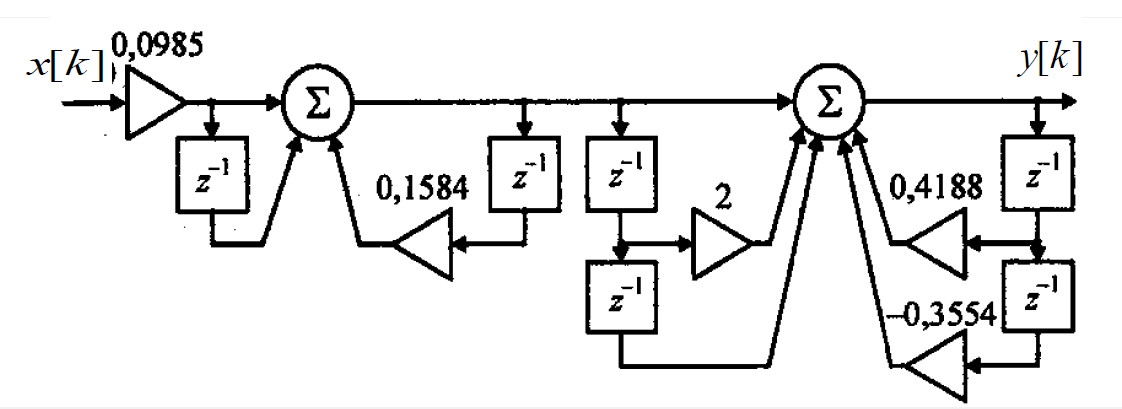

Данная система является цифровым фильтром Баттерворта 3-го порядка с частотой среза, равной 1/5 частоты дискретизации.

In [57]:
beta, alpha = signal.butter(N=3, Wn=1/5, btype='lowpass', analog=False, output='ba', fs=1)
beta, alpha 

(array([0.09853116, 0.29559348, 0.29559348, 0.09853116]),
 array([ 1.        , -0.57724052,  0.42178705, -0.05629724]))

In [58]:
signal.tf2sos(beta, alpha, pairing='keep_odd')

array([[ 0.09853116,  0.09853181,  0.        ,  1.        , -0.15838444,
         0.        ],
       [ 1.        ,  1.99999342,  0.99999342,  1.        , -0.41885608,
         0.35544676]])

In [59]:
signal.tf2sos(beta, alpha, pairing='nearest')

array([[ 0.09853116,  0.19706167,  0.09853051,  1.        , -0.15838444,
         0.        ],
       [ 1.        ,  1.00000658,  0.        ,  1.        , -0.41885608,
         0.35544676]])

$$ [\beta_0, \beta_1, \beta_2, 1, \alpha_1, \alpha_2]$$

$$ [a_0, a_1, a_2, 1, -b_1, -b_2]$$